<a href="https://colab.research.google.com/github/chettkulkarni/advanced_deep_learning/blob/master/Assignment2/Assignment2_PartB/Assignment2_Data_Aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augumentation Techniques

## CIFAR dataset

In [12]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from fastai.vision import *
from fastai.metrics import error_rate

In [14]:
bs = 64 # batch size
path = untar_data(URLs.CIFAR);

In [15]:
data = ImageDataBunch.from_folder(path=path, train='train', valid='test', size=32, bs=bs, ds_tfms=get_transforms(), num_workers=0)

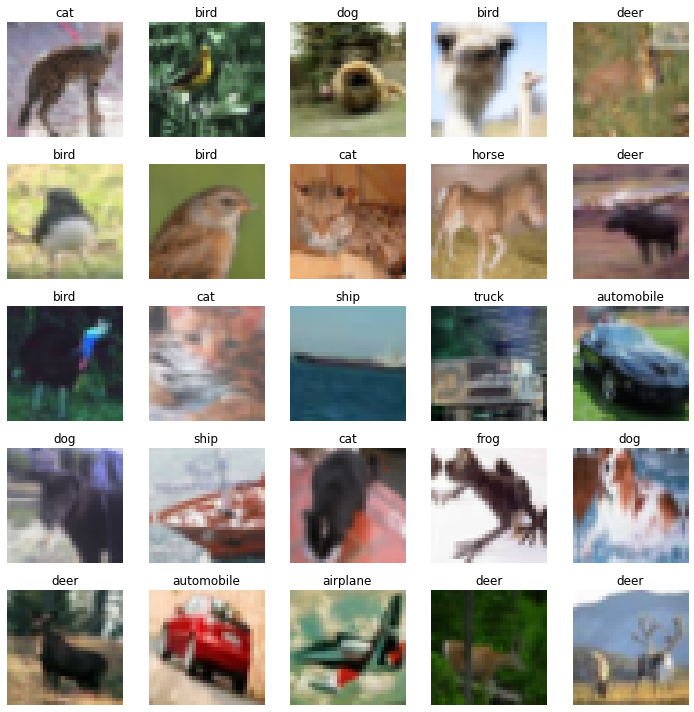

In [16]:
data.show_batch(rows=5, figsize=(10,10))

## Normal CNN learning without any data augumentation





In [17]:
learner = create_cnn(data, models.resnet50, metrics=accuracy)
learner.fit_one_cycle(5, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.392300,1.163124,0.610300,02:10
1,0.882279,0.773748,0.733400,02:10
2,0.781845,0.672849,0.761600,02:07
3,0.663530,0.585793,0.792000,02:06
4,0.620174,0.569002,0.797500,02:07


## Label Smoothing

In any Neural network we have 2 problems, Overfitting and Overconfidence. Label Smoothing helps us to deal with these problems.

All 1's will be made bit less than 1 and 0's will be made bit more than 0. Like that we smoothen the label. This is used when cross entropy is the loss function and activation is usually soft max

In [18]:
learner = create_cnn(data, models.resnet50, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy)
learner.fit_one_cycle(2, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.538215,1.309714,0.664900,02:08
1,1.178017,1.107569,0.737500,02:07


## Time Test Augumentation

Time Test Augumentation or TTA involves creating multiple augmented copies of each image in the test set, having the model make a prediction for each, then returning an ensemble of those predictions.

In [19]:
preds,targs = learner.TTA()
accuracy(preds, targs).item()

0.7663999795913696

## CutOut

Randomly masking out regions of input during training is called as cutout. This can be used to improve the robustness and overall performance of convolutional neural networks.

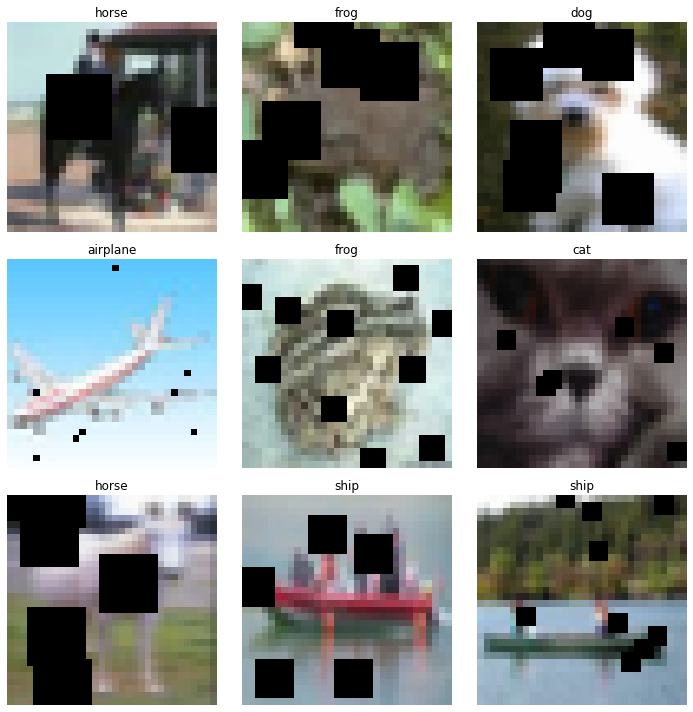

In [24]:
tfms = [cutout(n_holes=(1,10), length=(1, 10), p=1.),cutout(n_holes=(1,4), length=(1,10), p=1.)]
data = ImageDataBunch.from_folder(path=path, train='train', valid='test', size=32, bs=bs, ds_tfms=tfms, num_workers=0)
data.show_batch(rows=3, figsize=(10,10))

In [25]:
learner = create_cnn(data, models.resnet50, metrics=accuracy)
learner.fit_one_cycle(5, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,1.790120,2.919408,0.493200,01:49
1,1.306569,1.071556,0.628000,01:50
2,1.063239,0.861107,0.697100,01:50
3,0.956162,0.786343,0.721000,01:49
4,0.897245,0.752789,0.737600,01:48


## Mix Up

Instead of feeding the model the raw images, we take two (which could be in the same class or not) and do a linear combination of them.

So Basically , 2 Images are clubbed / mixxed together and fed to the model. Its proved that this technique builds model which performs better in real world scenarios.

In [26]:
learner = create_cnn(data, models.resnet50, metrics=accuracy).mixup()
learner.fit_one_cycle(5, max_lr=slice(1e-3,1e-2))

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:109: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


epoch,train_loss,valid_loss,accuracy,time
0,2.095578,2.703803,0.462100,01:43
1,1.635149,1.153133,0.600700,01:41
2,1.475623,0.955794,0.679200,01:43
3,1.384021,0.871918,0.709300,01:42
4,1.368143,0.849532,0.721000,01:42
